#HW1 - Data Exploration and Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Recommended formatting settings

In [2]:
from matplotlib import pylab
params = {'xtick.labelsize': 18,
          'ytick.labelsize': 18,
          'axes.titlesize' : 22,
          'axes.labelsize' : 20,
          'legend.fontsize': 18,
          'legend.title_fontsize': 22,
          'figure.titlesize': 24 }
pylab.rcParams.update(params)


## Loading the dataset

In [3]:
'''
#Google colab version
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]
'''

'\n#Google colab version\n!rm *.csv\n\nfrom google.colab import files\nprint("Please load the raw csv data")\nuploadedData = files.upload()\nfilename = list(uploadedData)[0]\n'

In [4]:
#Local machine version

filename = "virus_data.csv"


In [5]:
dataset = pd.read_csv(filename)

In [6]:
dataset.shape

(1250, 25)

Q2 - print the value_counts of converstaions_per_day

In [7]:
dataset.conversations_per_day.value_counts()


conversations_per_day
3     218
2     204
5     179
4     168
1     108
6     107
7      94
8      54
9      42
10     29
11     16
13      8
12      7
14      6
16      5
15      3
17      1
29      1
Name: count, dtype: int64

(Q4)	Split the data randomly into a training set (80% of the data) and a test set (20% of the data)

In [8]:
from sklearn.model_selection import train_test_split
sum_of_last_2_digits_IDS=67
train_set , test_set = train_test_split(dataset, test_size=0.2, random_state=sum_of_last_2_digits_IDS)

(Q5)	For both the training set and test set, report which fields have missing values and how many missing values there are. You can use Panda's function isnull().

In [9]:
pd.isnull(train_set).sum()

patient_id                0
age                       0
sex                       0
weight                    0
blood_type                0
current_location          0
num_of_siblings           0
happiness_score           0
household_income         85
conversations_per_day     0
sugar_levels              0
sport_activity            0
pcr_date                  0
PCR_01                    0
PCR_02                    0
PCR_03                    0
PCR_04                    0
PCR_05                    0
PCR_06                    0
PCR_07                    0
PCR_08                    0
PCR_09                    0
PCR_10                    0
spread                    0
risk                      0
dtype: int64

In [10]:
pd.isnull(test_set).sum()

patient_id                0
age                       0
sex                       0
weight                    0
blood_type                0
current_location          0
num_of_siblings           0
happiness_score           0
household_income         24
conversations_per_day     0
sugar_levels              0
sport_activity            0
pcr_date                  0
PCR_01                    0
PCR_02                    0
PCR_03                    0
PCR_04                    0
PCR_05                    0
PCR_06                    0
PCR_07                    0
PCR_08                    0
PCR_09                    0
PCR_10                    0
spread                    0
risk                      0
dtype: int64

Q6 (Q6)	Plot a histogram (see Tutorial 01) for each field where you found missing values in (Q5). Add these plots to your report. Answer: Can you recognize outliers?
Reminder: Create plots using only the training set.


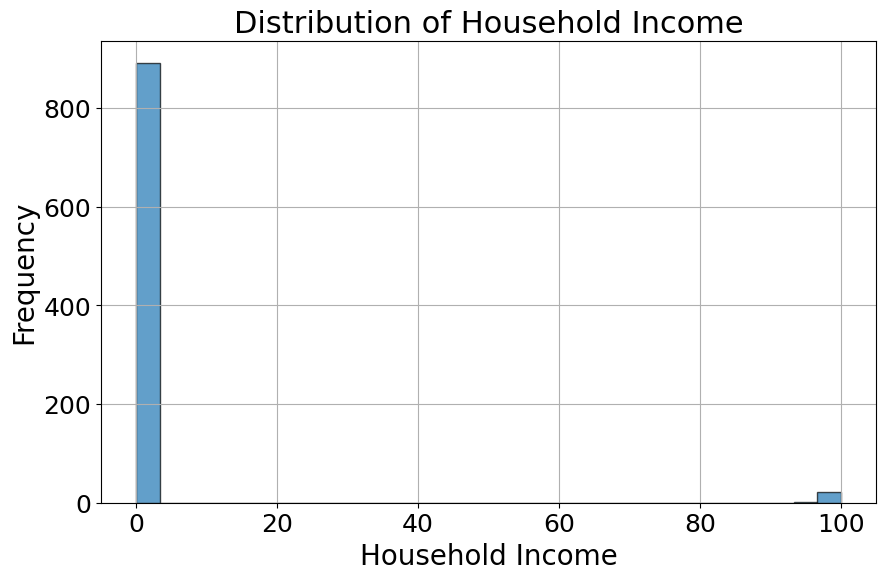

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(train_set['household_income'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Household Income')
plt.xlabel('Household Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

(Q7)	For each field where you found missing values, calculate the median and the mean in the training set, and report it. 
If there is a significant difference between the mean and median values, explain the reason. Which filling method do you prefer to use in our case, and why?


In [12]:
print ("the mean of the household income is: ", train_set['household_income'].mean()," and the median is: ", train_set['household_income'].median())

the mean of the household income is:  3.209617486338798  and the median is:  0.7



Task A: Use the method you chose to fill the missing values in both training and test sets. You can use Panda's function fillna().


In [13]:
household_income_median = train_set['household_income'].median()
train_set['household_income'].fillna(household_income_median, inplace=True)
test_set['household_income'].fillna(household_income_median, inplace=True)

C:\Users\t-darnissan\AppData\Local\Temp\ipykernel_25228\2011953623.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_set['household_income'].fillna(household_income_median, inplace=True)
C:\Users\t-darnissan\AppData\Local\Temp\ipykernel_25228\2011953623.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

Our medical experts suspect that it is possible to predict the spread using a pair of PCR features from the set: {PCR_04 , PCR_07 , PCR_09}.
Task B: For each possible pair from this set, create a seaborn.pairplot of the two aforementioned PCR features. Use the hue parameter to color the different (train) data points according to their spread. 


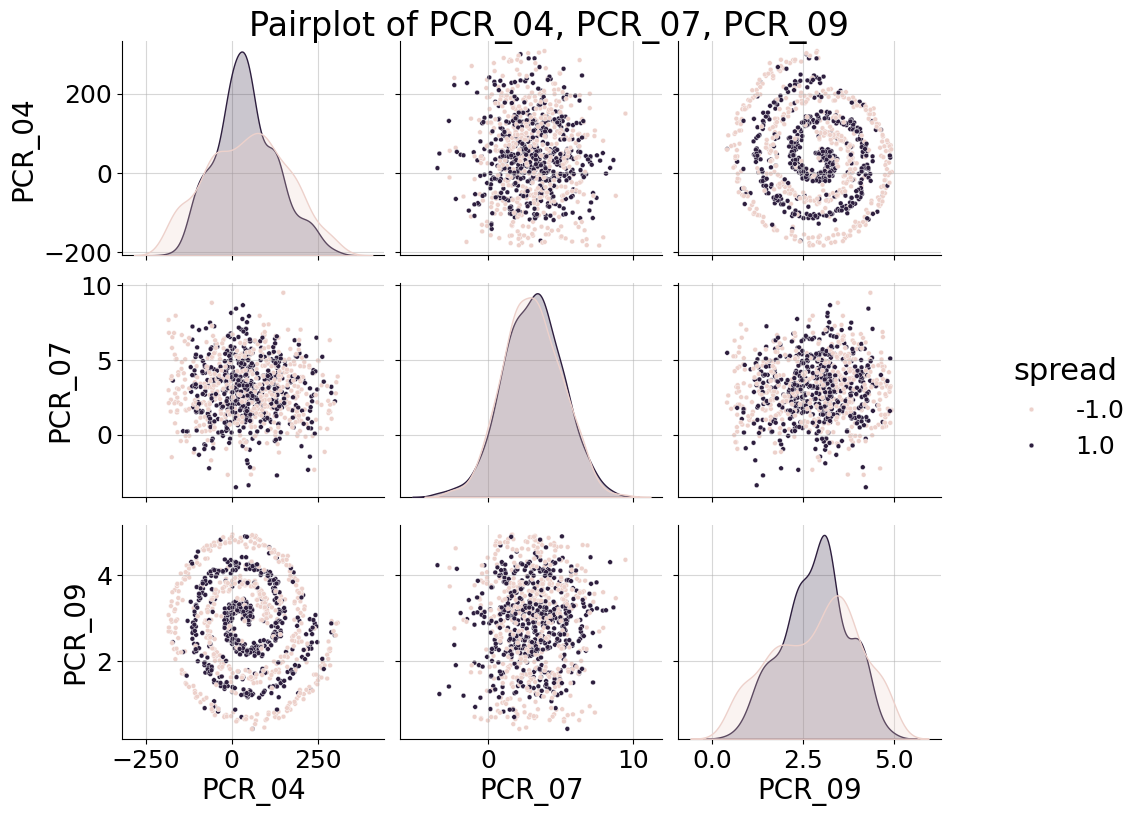

In [14]:
g=sns.pairplot(train_set,vars=['PCR_04','PCR_07','PCR_09'],hue='spread',plot_kws={"s":12})
g.fig.suptitle("Pairplot of PCR_04, PCR_07, PCR_09", y=1.02)

for ax in np.ravel(g.axes):
  ax.grid(alpha=0.5)

g.fig.set_size_inches(12,8)


Task D: Create a temporary DataFrame by taking only the two features you chose on ‎(Q8)  from the training set. Train a 1-NN model (with k=1) on this subset to fit the spread label. Use the provided visualize_clf function to visualize the decision regions of the model (send only the training set to this function, so that only the training examples will be scattered on the plot). 
Compute the training accuracy and test accuracy of the model by calling its 
score method, e.g., call h.score(Xtrain, Ytrain).

Make sure that all labels in your notebook (the ones in the dataset and the ones your model return) are ±1, and not {0,1} or {True,False}.


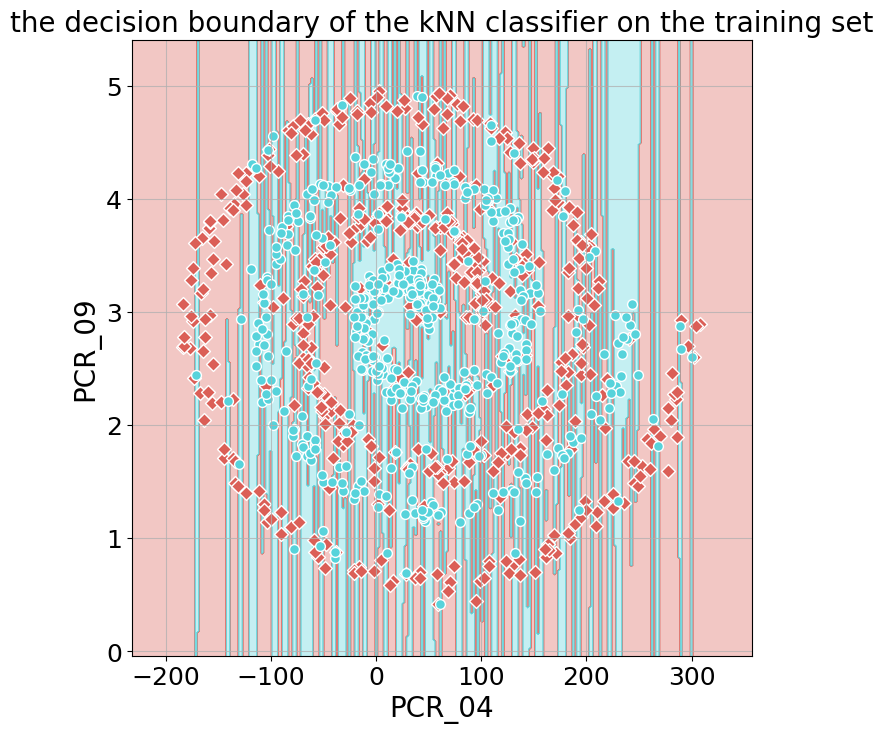

In [20]:
import knn
import visualize_clf
X_train = train_set[['PCR_04','PCR_09']]
Y_train = train_set['spread']
X_test = test_set[['PCR_04','PCR_09']]
Y_test = test_set['spread']
clf= knn.kNN(1)
clf.fit(X_train,Y_train)
visualize_clf.visualize_clf(clf,X_train,Y_train,"the decision boundary of the kNN classifier on the training set","PCR_04","PCR_09")

In [21]:
print("the accuracy of the classifier on the training set is: ",clf.score(X_train,Y_train))
print ("the accuracy of the classifier on the test set is: ",clf.score(X_test,Y_test))

the accuracy of the classifier on the training set is:  1.0
the accuracy of the classifier on the test set is:  0.572


# How to download from Colab?

In [ ]:
from google.colab import files
outputPath = "saved_file.csv"
dataset.to_csv(outputPath)
files.download(outputPath)

ModuleNotFoundError: No module named 'google'